# Accuracy verification

Test models with different parameters and compare the accuracy.

In [74]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [19]:
dfh1 = pd.read_csv('./data/1hBTCUSDT_part_1.csv')
dfh2 = pd.read_csv('./data/2021-1h-BTCUSDT_part_2.csv')

In [20]:
display(dfh1)
display(dfh2)

,Start,Stop,Open,Close,Low,High,Volume
0,1502942400000,1502945999999,4261.48,4308.83,4261.32,4313.62,47.181009
1,1502946000000,1502949599999,4308.83,4315.32,4291.37,4328.69,23.234916
2,1502949600000,1502953199999,4330.29,4324.35,4309.37,4345.45,7.229691
3,1502953200000,1502956799999,4316.62,4349.99,4287.41,4349.99,4.443249
4,1502956800000,1502960399999,4333.32,4360.69,4333.32,4377.85,0.972807
...,...,...,...,...,...,...,...
29471,1609444800000,1609448399999,28897.84,29126.70,28862.00,29139.65,1936.480299
29472,1609448400000,1609451999999,29126.71,28966.36,28900.79,29169.55,2524.473111
29473,1609452000000,1609455599999,28966.36,29100.84,28910.19,29143.73,1438.506326
29474,1609455600000,1609459199999,29100.83,28923.63,28780.00,29110.35,1976.419299


,Start,Stop,Open,Close,Low,High,Volume
0,1609459200000,1609462799999,28923.63,28995.13,28690.17,29031.34,2311.811445
1,1609462800000,1609466399999,28995.13,29409.99,28960.35,29470.00,5403.068471
2,1609466400000,1609469999999,29410.00,29194.65,29120.03,29465.26,2384.231560
3,1609470000000,1609473599999,29195.25,29278.40,29150.02,29367.00,1461.345077
4,1609473600000,1609477199999,29278.41,29220.31,29029.40,29395.00,2038.046803
...,...,...,...,...,...,...,...
943,1612854000000,1612857599999,48111.46,47505.40,47370.75,48142.19,5503.636222
944,1612857600000,1612861199999,47505.39,47109.51,46624.84,47928.23,6591.013418
945,1612861200000,1612864799999,47106.59,46401.30,46000.00,47160.00,4989.134602
946,1612864800000,1612868399999,46401.30,45641.77,45560.97,46588.00,4844.886059


In [21]:
to_datetime = lambda x: pd.to_datetime(x.to_numpy(), unit='ms')

In [22]:
dfh1[['Start', 'Stop']] = dfh1[['Start', 'Stop']].apply(to_datetime, axis=0)
dfh2[['Start', 'Stop']] = dfh2[['Start', 'Stop']].apply(to_datetime, axis=0)

In [24]:
display(dfh1)
display(dfh2)

,Start,Stop,Open,Close,Low,High,Volume
0,2017-08-17 04:00:00,2017-08-17 04:59:59.999,4261.48,4308.83,4261.32,4313.62,47.181009
1,2017-08-17 05:00:00,2017-08-17 05:59:59.999,4308.83,4315.32,4291.37,4328.69,23.234916
2,2017-08-17 06:00:00,2017-08-17 06:59:59.999,4330.29,4324.35,4309.37,4345.45,7.229691
3,2017-08-17 07:00:00,2017-08-17 07:59:59.999,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,2017-08-17 08:59:59.999,4333.32,4360.69,4333.32,4377.85,0.972807
...,...,...,...,...,...,...,...
29471,2020-12-31 20:00:00,2020-12-31 20:59:59.999,28897.84,29126.70,28862.00,29139.65,1936.480299
29472,2020-12-31 21:00:00,2020-12-31 21:59:59.999,29126.71,28966.36,28900.79,29169.55,2524.473111
29473,2020-12-31 22:00:00,2020-12-31 22:59:59.999,28966.36,29100.84,28910.19,29143.73,1438.506326
29474,2020-12-31 23:00:00,2020-12-31 23:59:59.999,29100.83,28923.63,28780.00,29110.35,1976.419299


,Start,Stop,Open,Close,Low,High,Volume
0,2021-01-01 00:00:00,2021-01-01 00:59:59.999,28923.63,28995.13,28690.17,29031.34,2311.811445
1,2021-01-01 01:00:00,2021-01-01 01:59:59.999,28995.13,29409.99,28960.35,29470.00,5403.068471
2,2021-01-01 02:00:00,2021-01-01 02:59:59.999,29410.00,29194.65,29120.03,29465.26,2384.231560
3,2021-01-01 03:00:00,2021-01-01 03:59:59.999,29195.25,29278.40,29150.02,29367.00,1461.345077
4,2021-01-01 04:00:00,2021-01-01 04:59:59.999,29278.41,29220.31,29029.40,29395.00,2038.046803
...,...,...,...,...,...,...,...
943,2021-02-09 07:00:00,2021-02-09 07:59:59.999,48111.46,47505.40,47370.75,48142.19,5503.636222
944,2021-02-09 08:00:00,2021-02-09 08:59:59.999,47505.39,47109.51,46624.84,47928.23,6591.013418
945,2021-02-09 09:00:00,2021-02-09 09:59:59.999,47106.59,46401.30,46000.00,47160.00,4989.134602
946,2021-02-09 10:00:00,2021-02-09 10:59:59.999,46401.30,45641.77,45560.97,46588.00,4844.886059


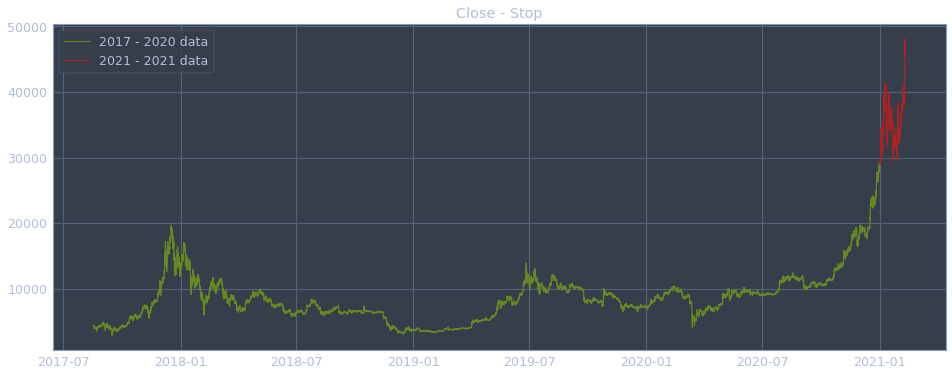

In [43]:
plt.figure(figsize=(16, 6))
plt.plot(dfh1['Stop'], dfh1['Close'], c='#668822', label='2017 - 2020 data')
plt.plot(dfh2['Stop'], dfh2['Close'], c='#aa2222', label='2021 - 2021 data')
plt.title('Close - Stop')
plt.legend()
plt.show()

Lets take the last 1000 values 'Close' from the 2020 and train the model.

In [67]:
X_train = dfh1['Stop'].to_numpy()[-1000:]
Y_train = dfh1['Close'].to_numpy()[-1000:]

X_test = dfh2['Stop'].to_numpy()
Y_test = dfh2['Close'].to_numpy()

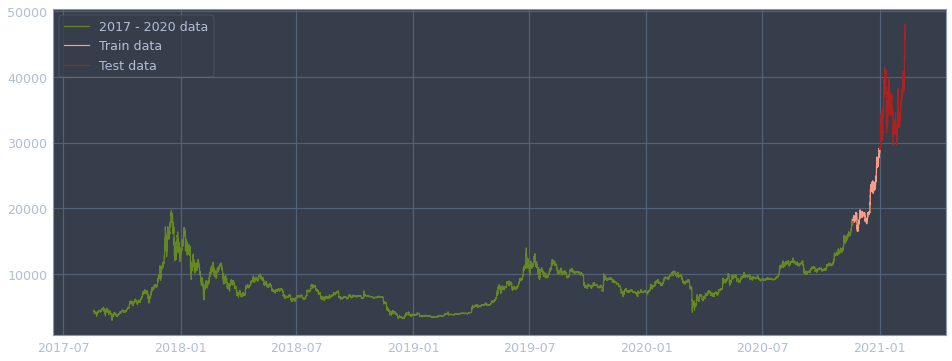

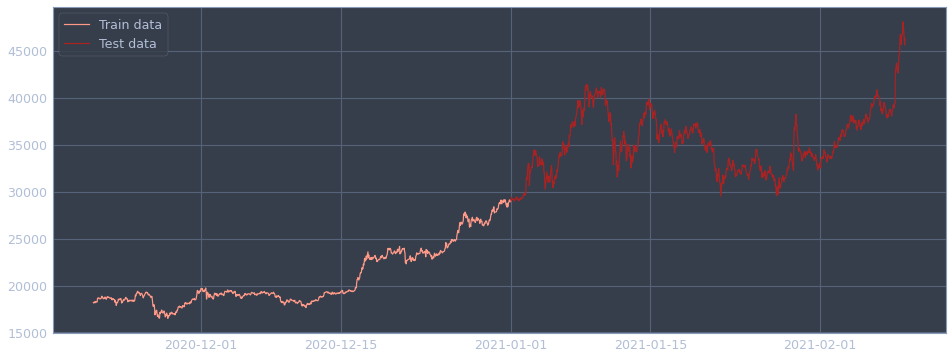

In [70]:
plt.figure(figsize=(16, 6))
plt.plot(dfh1['Stop'], dfh1['Close'], c='#668822', label='2017 - 2020 data')
plt.plot(X_train, Y_train, c='#ff9988', label='Train data')
plt.plot(X_test, Y_test, c='#aa2222', label='Test data')
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(X_train, Y_train, c='#ff9988', label='Train data')
plt.plot(X_test, Y_test, c='#aa2222', label='Test data')
plt.legend()
plt.show()

Experiments

In [ ]:
experiments = []
for p in [3, 4, 5]:
    for d in [0, 1, 2]:
        for q in [0, 1, 2, 3]:
            experiment = {
                'p': p,
                'd': d,
                'q': q,
            }
            
            model = ARIMA(Y_train, order=(p, d, q))
            
            start_time = time.time()
            model_fit = model.fit()
            time_spend = time.time() - start_time

            prediction = model_fit.forecast(len(Y_test))

            RMSE = np.sqrt(mean_squared_error(Y_test, prediction))
            MAE = mean_absolute_error(Y_test, prediction)
            MAPE = mean_absolute_percentage_error(Y_test, prediction)

            experiment['RMSE'] = RMSE
            experiment['MAE'] = MAE
            experiment['MAPE'] = MAPE
            experiment['time_spend'] = time_spend
            print(experiment)
            experiment['prediction'] = prediction
            
            experiments.append(experiment)

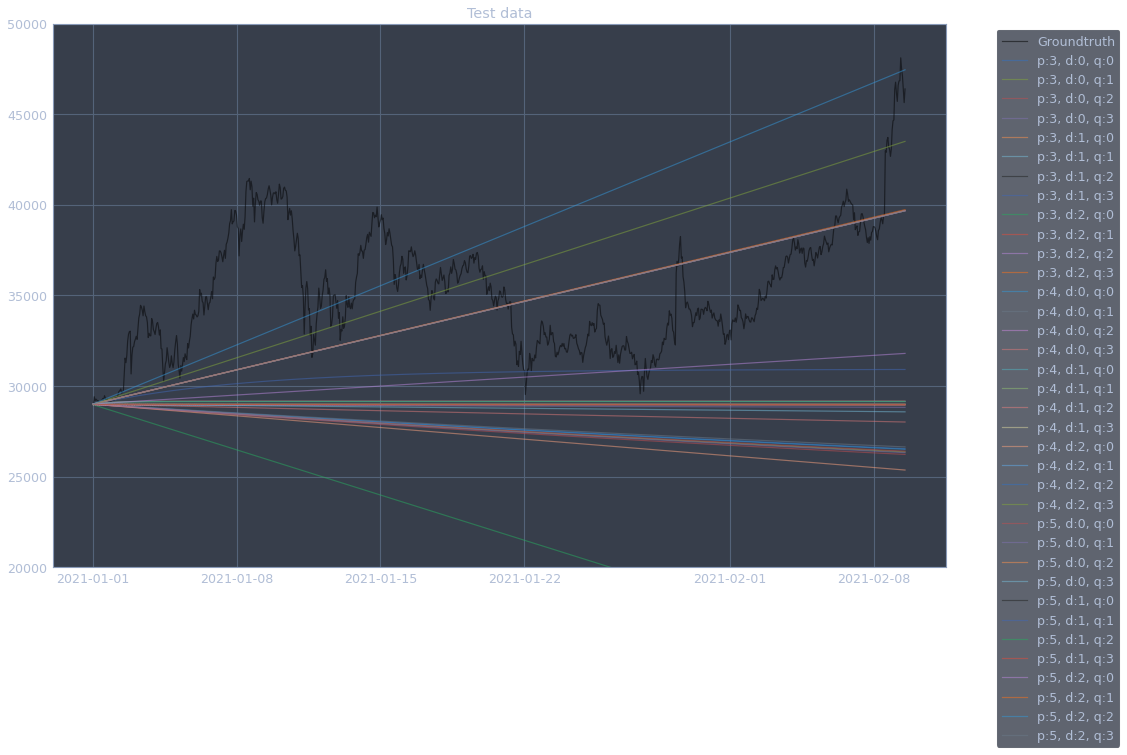

In [197]:
fig = plt.figure(figsize=(16, 10))
plt.plot(X_test, Y_test, color='black', label='Groundtruth', alpha=0.5)

for e in experiments:
    e_name = f"p:{e['p']}, d:{e['d']}, q:{e['q']}"
    plt.plot(X_test, e['prediction'], label=e_name, alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Test data')
plt.ylim(20000, 50000)
plt.show()

In [196]:
pd.DataFrame(data={
    'p': [e['p'] for e in experiments],
    'd': [e['d'] for e in experiments],
    'q': [e['q'] for e in experiments],
    'RMSE': [e['RMSE'] for e in experiments],
    'MAE': [e['MAE'] for e in experiments],
    'MAPE': [e['MAPE'] for e in experiments],
    'Average training time (sec)': [e['time_spend'] for e in experiments],
}).sort_values('RMSE')

,p,d,q,RMSE,MAE,MAPE,Average training time (sec)
10,3,2,2,4020.468849,3273.416657,0.091278,1.852272
22,4,2,2,4020.787100,3273.492019,0.091278,2.328555
9,3,2,1,4020.833085,3273.361133,0.091273,0.874950
35,5,2,3,4021.367685,3273.466544,0.091273,3.448350
21,4,2,1,4021.704498,3274.315236,0.091301,2.069807
33,5,2,1,4021.888812,3275.059041,0.091326,1.807317
11,3,2,3,4024.835468,3282.240123,0.091561,3.860556
23,4,2,3,4725.866413,4030.641660,0.114565,5.400262
7,3,1,3,5742.673991,4754.310420,0.127680,2.686649
32,5,2,0,5849.102153,4891.752226,0.131773,0.182286


# Results

Time Series forecasting models are very sensitive to the model parameters.  
There are a lot of methods to estimate the model parameteres such as MINIC, SCAN, ESACF.  
There is a trade-off in accuracy and performance of the model.